In [167]:
import numpy as np
# библиотека scipy.special содержит сигмоиду expit() 
import scipy.special
# библиотека для графического отображения массивов
import matplotlib.pyplot
# гарантировать размещение графиков в данном блокноте, а не в отдельном окне
%matplotlib inline

learning_rate_list = []
efficiency_list = []
epochs_list = []

In [252]:
efficiency_list1 = []

In [253]:
# определение класса нейронной сети
class neuralNetwork:
    
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # матрици весовых коэффициентов связей wih(между входным и скрытым слоями) и who(между скрытым и выходным слоями)
        # весовые коэффициенты связей между узлом i и узлом j следующего слоя обозначены как w_i_j:
        # rows - кол-во hidden, сollumns - кол-во input
        # w_11 w_21
        # w_12 w_22 и т.д.
        # self.wih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)
        # весовые коэффициенты за нормальным распределением
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # коэффициент обучения
        self.lr = learningrate
        
        # использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x) 
        pass
    
    # тренеровка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразовать список входных значений в двумерный массив
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        # ошибка выходного слоя = целевое значение - фактическое значение
        output_errors = targets - final_outputs
        
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределенные пропорционально весовым коэффициентам связей и рекомбинированые на скрытых узлах
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты связей между скрытым и выходным слоями
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs)) 
        # обновить весовые коэффициенты связей между входным и скрытым слоями
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    #опрос нейронной сети
    def query(self, inputs_list):
        # преобразовать список входных значений в двухмерный масив
        inputs = np.array(inputs_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [254]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# коэффициент обучения
learning_rate = 0.1
learning_rate_list.append(learning_rate)
# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [255]:
# загрузить в список тестовый набор данных CSV-файла набора MNIST
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [287]:
# тренеровка нейронной сети

# переменная epochs указывает, сколько раз тренеровочный набор данных используется для тренеровки сети
epochs = 10

for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений, используя символы запятой в качестве разделителей
        all_values = record.split(",")
        # масштабировать и сместить входные значения
        inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0.01, за исключением желаемого маркерованого значения, равного 0.99)
        targets = np.zeros(output_nodes) + 0.01

        # all_values[0] целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [ ]:
epochs_list.append(epochs)

In [288]:
# тестирование нейронной сети
# загрузить в список тестовый набор CSV-файла набора MNIST
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [228]:
# получить первую тестовою запись 
all_values = test_data_list[0].split(",")
# вывести маркер
print(all_values[0])

7


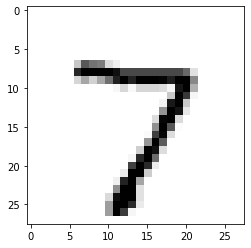

In [229]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap="Greys")

In [230]:
n.query((np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01)

array([[5.84458088e-03],
       [2.10431981e-03],
       [7.48522053e-03],
       [5.13780321e-03],
       [3.15604173e-03],
       [1.49721450e-03],
       [9.45451832e-03],
       [9.74711646e-01],
       [5.22033416e-03],
       [6.85030252e-04]])

In [289]:
# журнал оценок роботы сети 
scorecard = []

In [290]:
# перебрать все записи в тестовом наборе данных
for record in test_data_list:
    # получить список значений, используя символы запятой в качестве разделителей
    all_values = record.split(",")
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    print(correct_label, "истинный маркер")
    # масштабировать и сместить входные данные
    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = np.argmax(outputs)
    print(label, "ответ сети")
    
    # присоеденить оценку ответа к концу списка 
    if label == correct_label:
        # в случае правильного ответа сети присоеденить к списку 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоеденить к списку 0
        scorecard.append(0)
        pass
    pass

7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
3 истинн

6 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ 

3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
3 истинн

9 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ 

4 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ 

8 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
2 истинный маркер
2 ответ 

9 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
2 ответ сети
4 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ 

7 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ 

2 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ 

6 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ 

1 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ 

3 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ 

6 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
7 ответ сети
5 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ 

4 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ 

4 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ 

6 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ 

9 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ 

1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ 

2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ 

6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ 

5 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ 

0 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ 

0 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ 

8 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ 

8 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ 

7 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ 

6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
7 истинн

In [291]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [292]:
# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = np.asarray(scorecard)
efficiency = scorecard_array.sum() / scorecard_array.size
print("Эффективность =", efficiency)
efficiency_list1.append(efficiency)

Эффективность = 0.96


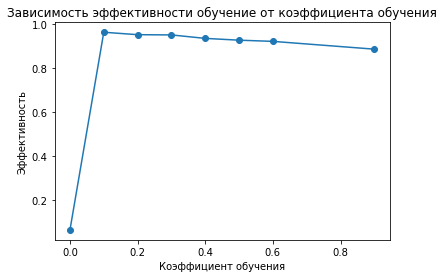

In [164]:
matplotlib.pyplot.scatter(learning_rate_list, efficiency_list)
matplotlib.pyplot.plot(learning_rate_list, efficiency_list)
matplotlib.pyplot.title('Зависимость эффективности обучение от коэффициента обучения')
matplotlib.pyplot.ylabel('Эффективность')
matplotlib.pyplot.xlabel('Коэффициент обучения')
matplotlib.pyplot.show()

In [165]:
print(learning_rate_list)
print(efficiency_list)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9]
[0.0652, 0.9639, 0.9528, 0.9517, 0.936, 0.9278, 0.9224, 0.887]


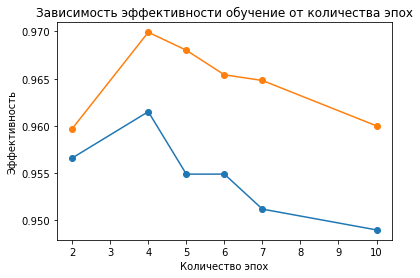

In [299]:
matplotlib.pyplot.scatter(epochs_list, efficiency_list)
matplotlib.pyplot.scatter(epochs_list, efficiency_list1)
matplotlib.pyplot.plot(epochs_list, efficiency_list)
matplotlib.pyplot.plot(epochs_list, efficiency_list1)
matplotlib.pyplot.title('Зависимость эффективности обучение от количества эпох')
matplotlib.pyplot.ylabel('Эффективность')
matplotlib.pyplot.xlabel('Количество эпох')
matplotlib.pyplot.show()

In [298]:
print(epochs_list)
print(efficiency_list)

[2, 4, 5, 6, 7, 10]
[0.9566, 0.9615, 0.9549, 0.9549, 0.9512, 0.949]


In [293]:
print(epochs_list)
print(efficiency_list1)

[2, 4, 5, 6, 7, 10]
[0.9597, 0.9699, 0.968, 0.9654, 0.9648, 0.96]
